In [2]:
pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     --------------------- ---------------- 524.3/948.2 kB 5.6 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139064 sha256=f9ebcc8af7ae843412f043bb2ad4ef192af7b798504939de1cf360a183dd98e2
  Stored in directory: c:\users\91886\appdata\local\pip\cache\wheels\8f\65\34\456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [48]:
#The below code compares two prominent companies stocks- Tesla and Game Stop by plotting historical price chart and revenue 
#The code ran succesfully using jupyter notebook 

#Data required to plot historical price chart is extracted using  yfinance or yahoo finance API 
import yfinance as yf

import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [49]:
#This function is defined to plot graph  using dataframe as input

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()


In [50]:
#extracting Tesla stock data
tesla=yf.Ticker("TSLA")
tesla_data=tesla.history(period="max")
tesla_data.reset_index(inplace=True)

#webscraping to get revenue of Tesla 
url= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
r=requests.get(url)
html_data=r.text

In [51]:
#using beautiful soup to parse
html_parsed=BeautifulSoup(html_data,'html.parser')


In [52]:
tesla_revenue=dfs[1]
tesla_revenue

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


In [53]:
dfs=pd.read_html(url)
tesla_revenue=dfs[1]
tesla_revenue.rename(columns={'Tesla Quarterly Revenue (Millions of US $)':'Date','Tesla Quarterly Revenue (Millions of US $).1':'Revenue'}, inplace=True)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$',"",regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [54]:
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [55]:
#extracting Game Stop data
gme=yf.Ticker("GME")
gme_data=gme.history(period="max")
gme_data.reset_index(inplace=True)

In [56]:
url=' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
r=requests.get(url)
html_data=r.text

soup=BeautifulSoup(html_data,"html.parser")
s=soup.find_all('table')
tables = soup.find_all('table')
gme_revenue = pd.read_html(str(tables))[1]

In [57]:
gme_revenue.rename(columns={'GameStop Quarterly Revenue (Millions of US $)':'Date','GameStop Quarterly Revenue (Millions of US $).1':'Revenue'},inplace=True)
gme_revenue['Revenue']= gme_revenue['Revenue'].str.replace(r',|\$','',regex=True)


In [58]:
gme_revenue.head()

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


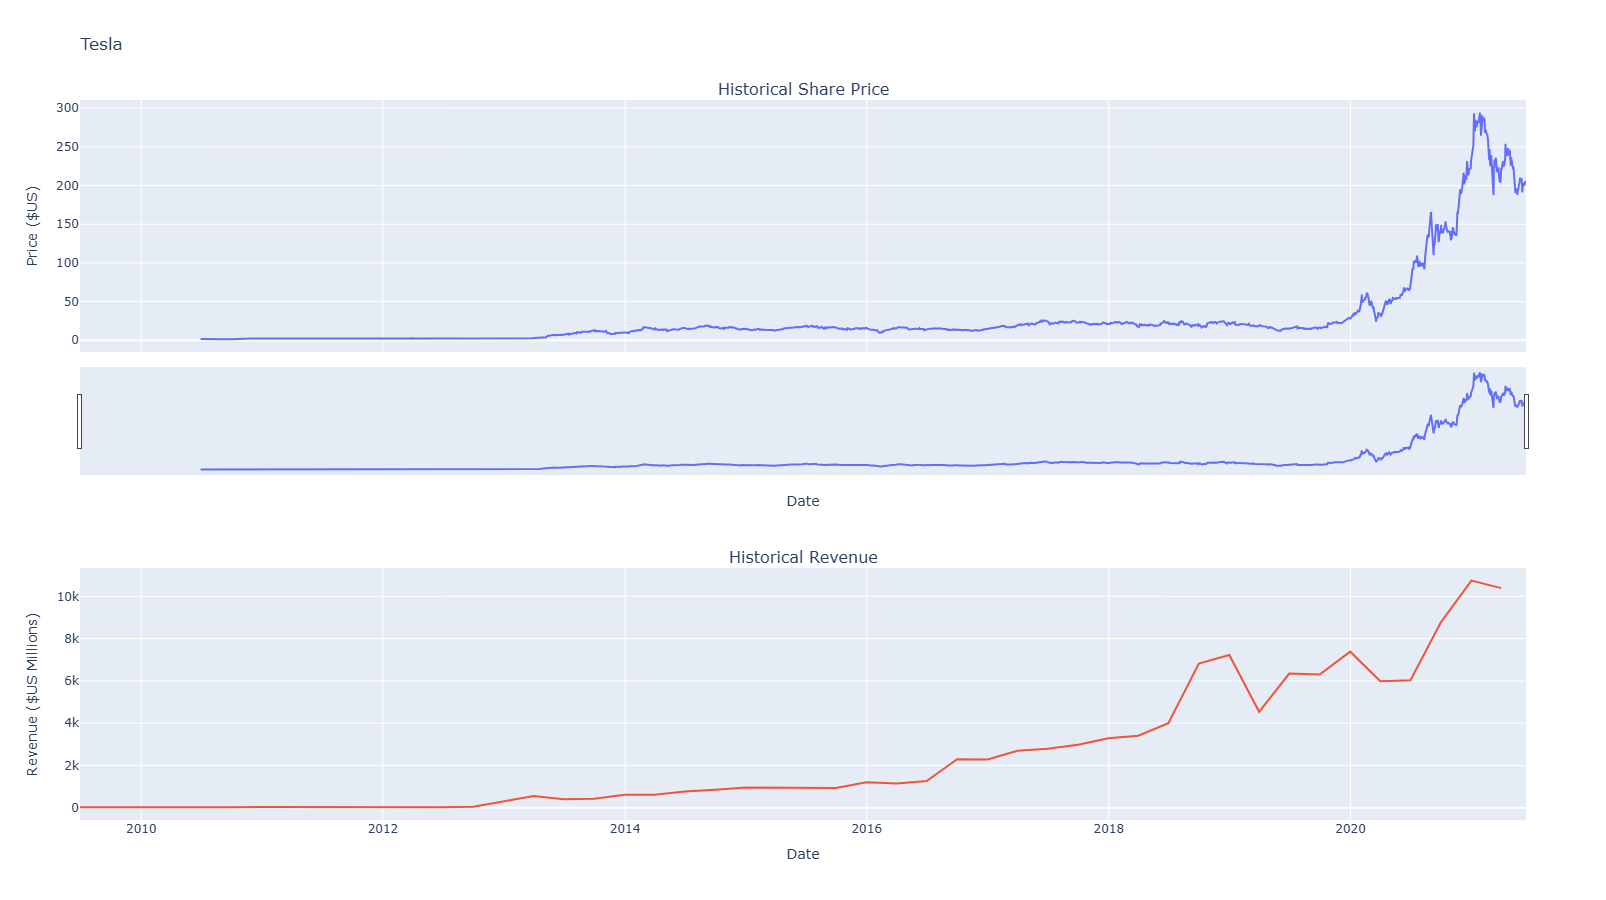

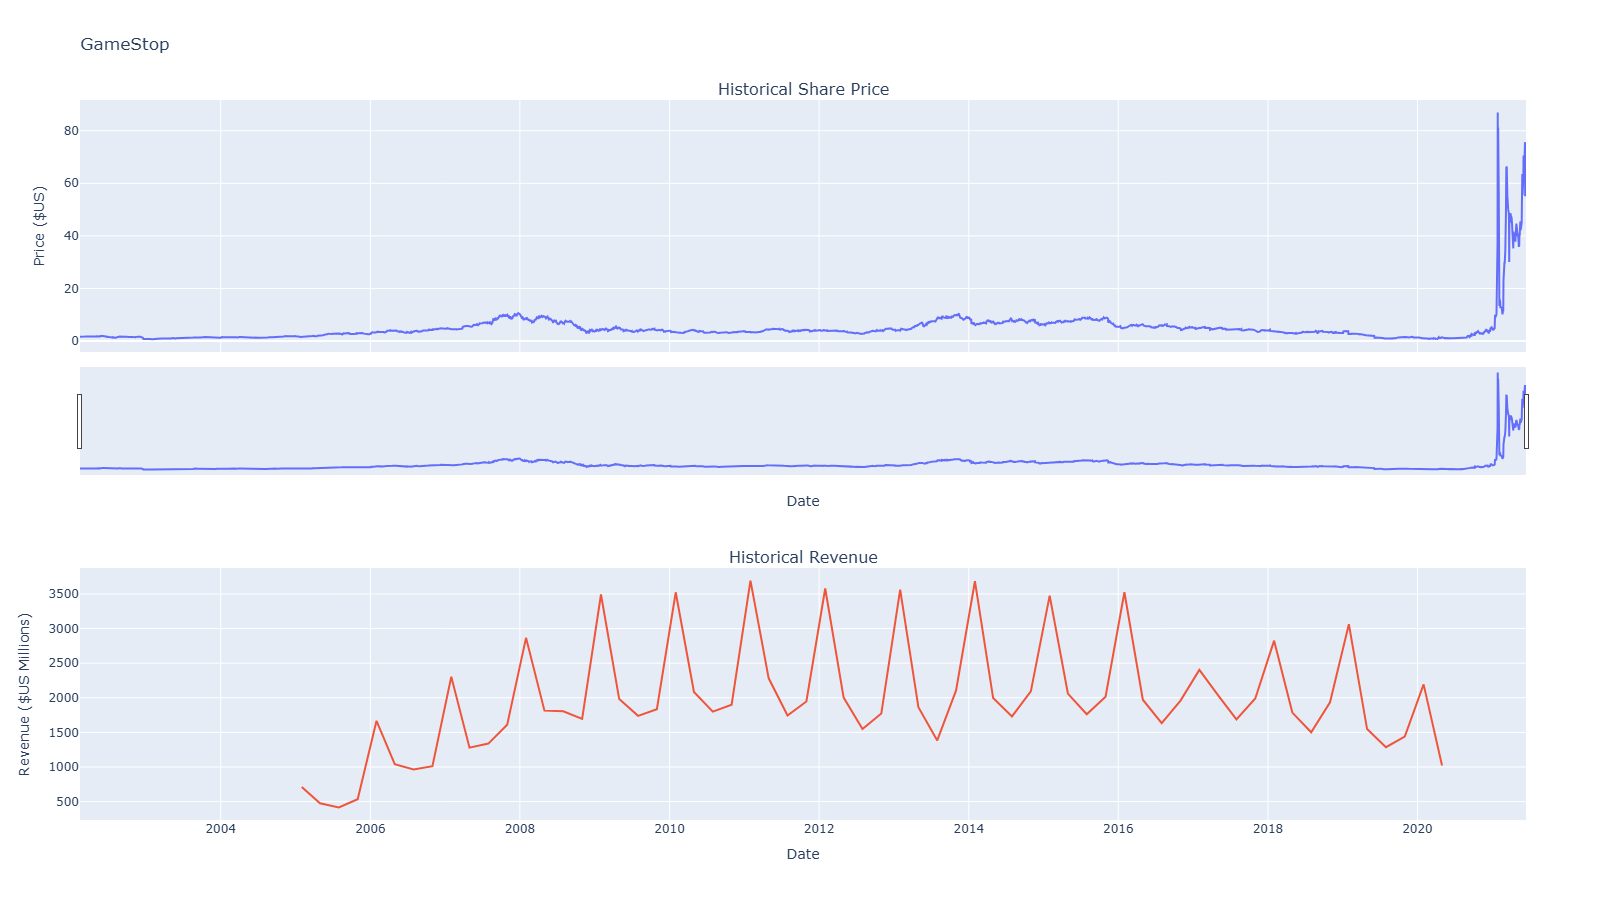

In [59]:
#plotting graph using previously defined "make_graph"
make_graph(tesla_data,tesla_revenue,'Tesla')
make_graph(gme_data, gme_revenue, 'GameStop')

# Inference Made from Share and revenue plots
### The share price of both TESLA and GME has suddenly sky-rocketed in the reset year. The price of TESLA has sky-rocketed a year(2020) prior to GME which shows rise in rice from Jan,2021.
### The revenue of Tesla somewhat follows share price sentiments . Like its share price it has shows sudden increase in revenue in the rest years 
### The revenue of GME has been cyclic in nature with a cycle of one year. GME revenue followed positive trend from 2005 to 2012 after which its revenue followed a downtrend

# Looking from the trend TESLA would be better stock as the stock price is rising and its revenue too,which means the company is growing and its not inflated
